# Project: KNN Algorithm on Classified Data

## Table of Contents:
    .Introduction
    .KNN Algorithm
    .Conclusion

## Introduction:

### About the Dataset:
This data is a classified data with unexplained features and the class of these features.
The class of all those features is either a class one, or a class zero

This dataset contains 1000 entries.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling and Cleaning
in this section we will load the data, and then check for its cleanliness. and show some quick summary about the data.

#### Loading The Data

In [2]:
df = pd.read_csv('KNN_Project_Data')
df.head(2)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [4]:
print('The data has {} samples and {} features'.format(df.shape[0],
                                                       df.shape[1]))

The data has 1000 samples and 11 features


In [6]:
#checking for nulls
print('The Data has a total of {} nulls'.format(df.isnull().sum().sum()))

The Data has a total of 0 nulls


In [7]:
#checking for duplicated rows
print('The number of duplicated rows:{}'.format(df.duplicated().sum()))

The number of duplicated rows:0


In [9]:
#quick descriptive statistics about the features
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


##### i will rename the columns, making them lower cased and replacing the spaces with a "_" for consistency

In [11]:
df.rename(columns = lambda x : x.lower().replace(' ','_'),
          inplace = True)

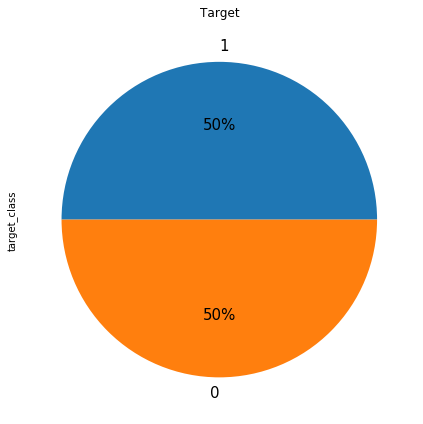

In [24]:
df['target_class'].value_counts().plot(kind = 'pie', figsize=(12,6), 
                                    fontsize=15, autopct='%1.0f%%');
plt.title('Target');
plt.tight_layout()

##### The data is perfectly balanced and seems ready for the KNN Classification

### KNN Algorithm
The K Nearest Neighbors is a classification algorithm that operates on a very simple principle.
The prediction is based on the K nearest points of the point that we want to classify, it simply calculates the distance from "X" to all points, then these distances is sorted fom smallest to biggest, and finally predict the class by picking the major label of the "K" closest points

![title](img/knn-explain.png) 

The thing is we have to pick the right K number, as the picture above shows that if K is chose differently the label will differ

We start our algorithm by standarizing the scale of the variables so that variables with high ranges will get closer, and the near ones will get further.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[df.columns[:-1]])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
features = scaler.transform(df[df.columns[:-1]])
features = pd.DataFrame(features , columns = df.columns[:-1])

##### The features is now scaled in the features dataframe
#### Train test splitting

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    df['target_class'],
                                                    test_size=0.33)

#### Initiate The KNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Prediction

In [54]:
pred = model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,mean_absolute_error
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       167
           1       0.80      0.81      0.80       163

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [59]:
pd.crosstab(y_test, pred,
            rownames=['True'],
            colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,133,34,167
1,31,132,163
All,164,166,330


#### We improve any model by trying different hyperparameters, and the only hyper parameter in KNN algorithm is "K", so we will try for different number and pick the one that best fit.

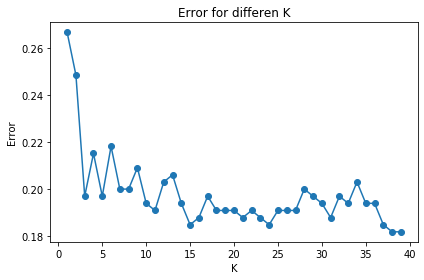

In [66]:
error_values = []

for K in range(1,40):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error = mean_absolute_error(pred,y_test)
    error_values.append(error)

# plotting the error for different values

plt.plot(range(1,40),error_values, marker = 'o')
plt.title('Error for differen K')
plt.xlabel('K')
plt.ylabel('Error')

plt.tight_layout()

##### The smallest error comes with K = 15

In [80]:
model = KNeighborsClassifier(n_neighbors= 15)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       167
           1       0.80      0.84      0.82       163

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



In [81]:
pd.crosstab(y_test, pred,
            rownames=['True'],
            colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,132,35,167
1,26,137,163
All,158,172,330


### Conclusion

This data is a classified data with unexplained features and the class of these features. The class of all those features is either a class one, or a class zero.

The data has 1000 samples and 11 features, The Data has a total of 0 nulls, The number of duplicated rows:0.

The data was perfectly balanced and was ready for the KNN Classification.
    
This code uses pandas and matplotlib with good documentation at each step.
    
The K Nearest Neighbors is a classification algorithm that operates on a very simple principle. The prediction is based on the K nearest points of the point that we want to classify, it simply calculates the distance from "X" to all points, then these distances is sorted fom smallest to biggest, and finally predict the class by picking the major label of the "K" closest points.

We started our algorithm by standarizing the scale of the variables so that variables with high ranges will get closer, and the near ones will get further.

We improve any model by trying different hyperparameters, and the only hyperparameter in KNN algorithm is "K", so we tried for different number and pick the one that best fit, and it was when K = 15.
